In [151]:
import os
from pathlib import Path

# Change directory
# Modify this cell to insure that the output shows the correct path.
# Define all paths relative to the project root shown in the cell output
project_root = "/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks"
i = 0
try:
    os.chdir(project_root)
    if not Path("LICENSE").is_file():
        i = 0
        while i < 4 and (not Path("LICENSE").is_file()):
            os.chdir(Path(Path.cwd(), "../"))
            i += 1
        project_root = Path.cwd()
except FileNotFoundError:
    print("Please define the project root relative to the current directory")
print(Path.cwd())

/Users/liuqiaowei/SourceCode/freqtrade


In [152]:
from freqtrade.configuration import Configuration


# Customize these according to your needs.

# Initialize empty configuration object
config = Configuration.from_files(["./user_data/config.json"])
# Optionally (recommended), use existing configuration file
# config = Configuration.from_files(["user_data/config.json"])

# Location of the data
data_location = config["datadir"]
config['timeframe'] = '1h'
# Pair to analyze - Only use one pair here
# config['exchange']['pair_whitelist']

In [153]:
from freqtrade.data.history import load_pair_history
from freqtrade.enums import CandleType

candles_dict = {}
for pair in config['exchange']['pair_whitelist']:
    candles = load_pair_history(
        datadir=data_location,
        timeframe=config["timeframe"],
        pair=pair,
        data_format="feather",  # Make sure to update this to your data
        candle_type=CandleType.FUTURES,
    )
    # candles['sym'] = pair
    # candles.set_index('date', inplace=True)
    # candles.set_index('sym', append=True, inplace=True)
    # candles['return'] = candles['close'].pct_change().shift(-2)
    
    # Keep Latest week for testing
    # candles_dict[pair] = candles.iloc[-268:]
    candles_dict[pair] = candles

In [154]:
import pandas as pd
import talib.abstract as ta

def factor_open(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = dataframe['open']
    return dataframe

def factor_rocr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ROCR(dataframe, timeperiod=52)
    return dataframe

def factor_rocr100(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ROCR100(dataframe, timeperiod=26)
    return dataframe

def factor_roc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ROC(dataframe, timeperiod=28)
    return dataframe

def factor_trix(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.TRIX(dataframe, timeperiod=34)
    return dataframe

def factor_trix1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.TRIX(dataframe, timeperiod=13)
    return dataframe

def factor_cci(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.CCI(dataframe, timeperiod=20)
    return dataframe

def factor_rsi(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.RSI(dataframe, timeperiod=49)
    return dataframe

def factor_adx(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADX(dataframe, timeperiod=34)
    return dataframe

def factor_dx(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.DX(dataframe, timeperiod=55)
    return dataframe

def factor_adxr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADXR(dataframe, timeperiod=34)
    return dataframe

def factor_ppo(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.PPO(dataframe, fastperiod=41, slowperiod=34)
    return dataframe

def factor_bop(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.BOP(dataframe)
    return dataframe

def factor_minus_di(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MINUS_DI(dataframe, timeperiod=39)
    return dataframe

def factor_ultosc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ULTOSC(dataframe, timeperiod1=57, timeperiod2=59, timeperiod=60)
    return dataframe

def factor_ultosc1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ULTOSC(dataframe, timeperiod1=29, timeperiod2=29, timeperiod=30)
    return dataframe

def factor_mfi(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MFI(dataframe, timeperiod=35)
    return dataframe

def factor_plus_di(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.PLUS_DI(dataframe, timeperiod=56)
    return dataframe

def factor_plus_dm(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.PLUS_DM(dataframe, timeperiod=58)
    return dataframe

def factor_willr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.WILLR(dataframe, timeperiod=28)
    return dataframe

def factor_aroonosc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.AROONOSC(dataframe, timeperiod=28)
    return dataframe

def factor_aroondown(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name], _ = ta.AROON(dataframe, timeperiod=51)
    return dataframe

def factor_aroonup(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    _, dataframe[pair_name] = ta.AROON(dataframe, timeperiod=51)
    return dataframe

def factor_natr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.NATR(dataframe, timeperiod=11)
    return dataframe

def factor_bop(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.BOP(dataframe)
    return dataframe

def factor_adosc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADOSC(dataframe, fastperiod=31, slowperiod=34)
    return dataframe

def factor_adosc1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADOSC(dataframe, fastperiod=35, slowperiod=32)
    return dataframe

def factor_ad(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.AD(dataframe)
    return dataframe

def factor_apo(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.APO(dataframe, fastperiod=12, slowperiod=24)
    return dataframe


In [155]:
from user_data.notebooks.ta_factors import TAFactors
factors_df_dict = {}

open_df = pd.DataFrame()
for key, value in candles_dict.items():
    candles = value.copy()
    candles.set_index(['date'], inplace=True)
    if len(factors_df_dict.keys()) == 0:
        # Hard code parameter first for research
        # factors_df_dict['ROCR'] = factor_rocr(candles, key)[key].to_frame()
        factors_df_dict['ROC'] = factor_roc(candles, key)[key].to_frame()
        factors_df_dict['NATR'] = factor_natr(candles, key)[key].to_frame()
        # factors_df_dict['ROCR100'] = factor_rocr100(candles, key)[key].to_frame()
        factors_df_dict['TRIX'] = factor_trix(candles, key)[key].to_frame()
        # factors_df_dict['TRIX1'] = factor_trix1(candles, key)[key].to_frame()
        factors_df_dict['PPO'] = factor_ppo(candles, key)[key].to_frame()
        factors_df_dict['DX'] = factor_dx(candles, key)[key].to_frame()
        factors_df_dict['ADX'] = factor_adx(candles, key)[key].to_frame()
        factors_df_dict['MINUS_DI'] = factor_minus_di(candles, key)[key].to_frame()
        # factors_df_dict['ADXR'] = factor_adxr(candles, key)[key].to_frame()
        factors_df_dict['ULTOSC'] = factor_ultosc(candles, key)[key].to_frame()
        factors_df_dict['ULTOSC1'] = factor_ultosc1(candles, key)[key].to_frame()
        factors_df_dict['MFI'] = factor_mfi(candles, key)[key].to_frame()
        # factors_df_dict['AROONDOWN'] = factor_aroondown(candles, key)[key].to_frame()
        # factors_df_dict['AROONUP'] = factor_aroonup(candles, key)[key].to_frame()
        factors_df_dict['PLUS_DI'] = factor_plus_di(candles, key)[key].to_frame()
        # factors_df_dict['BOP'] = factor_bop(candles, key)[key].to_frame()
        factors_df_dict['PLUS_DM'] = factor_plus_dm(candles, key)[key].to_frame()
        factors_df_dict['AROONOSC'] = factor_aroonosc(candles, key)[key].to_frame()
        factors_df_dict['WILLR'] = factor_willr(candles, key)[key].to_frame()
        factors_df_dict['ADOSC'] = factor_adosc(candles, key)[key].to_frame()
        # factors_df_dict['ADOSC1'] = factor_adosc1(candles, key)[key].to_frame()
        factors_df_dict['AD'] = factor_ad(candles, key)[key].to_frame()
        factors_df_dict['APO'] = factor_apo(candles, key)[key].to_frame()
        open_df = factor_open(candles, key)[key].to_frame()
    else:
        # factors_df_dict['ROCR'] = factors_df_dict['ROCR'].join(factor_rocr(candles, key)[key].to_frame())
        factors_df_dict['ROC'] = factors_df_dict['ROC'].join(factor_roc(candles, key)[key].to_frame())
        factors_df_dict['NATR'] = factors_df_dict['NATR'].join(factor_natr(candles, key)[key].to_frame())
        # factors_df_dict['ROCR100'] = factors_df_dict['ROCR100'].join(factor_rocr100(candles, key)[key].to_frame())
        factors_df_dict['TRIX'] = factors_df_dict['TRIX'].join(factor_trix(candles, key)[key].to_frame())
        # factors_df_dict['TRIX1'] = factors_df_dict['TRIX1'].join(factor_trix1(candles, key)[key].to_frame())
        factors_df_dict['DX'] = factors_df_dict['DX'].join(factor_dx(candles, key)[key].to_frame())
        factors_df_dict['PPO'] = factors_df_dict['PPO'].join(factor_ppo(candles, key)[key].to_frame())
        factors_df_dict['ADX'] = factors_df_dict['ADX'].join(factor_adx(candles, key)[key].to_frame())
        factors_df_dict['MINUS_DI'] = factors_df_dict['MINUS_DI'].join(factor_minus_di(candles, key)[key].to_frame())
        # factors_df_dict['ADXR'] = factors_df_dict['ADXR'].join(factor_adxr(candles, key)[key].to_frame())
        factors_df_dict['ULTOSC'] = factors_df_dict['ULTOSC'].join(factor_ultosc(candles, key)[key].to_frame())
        factors_df_dict['ULTOSC1'] = factors_df_dict['ULTOSC1'].join(factor_ultosc1(candles, key)[key].to_frame())
        factors_df_dict['MFI'] = factors_df_dict['MFI'].join(factor_mfi(candles, key)[key].to_frame())
        # factors_df_dict['AROONDOWN'] = factors_df_dict['AROONDOWN'].join(factor_aroondown(candles, key)[key].to_frame())
        # factors_df_dict['AROONUP'] = factors_df_dict['AROONUP'].join(factor_aroonup(candles, key)[key].to_frame())
        factors_df_dict['PLUS_DI'] = factors_df_dict['PLUS_DI'].join(factor_plus_di(candles, key)[key].to_frame())
        # factors_df_dict['BOP'] = factors_df_dict['BOP'].join(factor_bop(candles, key)[key].to_frame())
        factors_df_dict['PLUS_DM'] = factors_df_dict['PLUS_DM'].join(factor_plus_dm(candles, key)[key].to_frame())
        factors_df_dict['AROONOSC'] = factors_df_dict['AROONOSC'].join(factor_aroonosc(candles, key)[key].to_frame())
        factors_df_dict['WILLR'] = factors_df_dict['WILLR'].join(factor_willr(candles, key)[key].to_frame())
        factors_df_dict['ADOSC'] = factors_df_dict['ADOSC'].join(factor_adosc(candles, key)[key].to_frame())
        # factors_df_dict['ADOSC1'] = factors_df_dict['ADOSC1'].join(factor_adosc1(candles, key)[key].to_frame())
        factors_df_dict['AD'] = factors_df_dict['AD'].join(factor_ad(candles,key)[key].to_frame())
        factors_df_dict['APO'] = factors_df_dict['APO'].join(factor_apo(candles, key)[key].to_frame())
        open_df = open_df.join(factor_open(candles, key)[key].to_frame())



In [156]:
from user_data.notebooks.factor_analysis_helper import standardize

# Standardize Factor

standardized_factors_df_dict = {}
for key in factors_df_dict.keys():
    print(key)
    standardized_factors_df_dict[key] = standardize(factors_df_dict[key])

standardized_factors_df_dict.keys()

ROC
NATR
TRIX
PPO
DX
ADX
MINUS_DI
ULTOSC
ULTOSC1
MFI
PLUS_DI
PLUS_DM
AROONOSC
WILLR
ADOSC
AD
APO


dict_keys(['ROC', 'NATR', 'TRIX', 'PPO', 'DX', 'ADX', 'MINUS_DI', 'ULTOSC', 'ULTOSC1', 'MFI', 'PLUS_DI', 'PLUS_DM', 'AROONOSC', 'WILLR', 'ADOSC', 'AD', 'APO'])

In [157]:
from user_data.notebooks.factor_analysis_helper import Quick_Factor_Return_N_IC

# IC IR Checking
factor_icir_result = {}
factors_icir_report_dict = {}
icir_factors_list = []

for key in standardized_factors_df_dict.keys():
    factor_icir_result[key], factors_icir_report_dict[key] = Quick_Factor_Return_N_IC(standardized_factors_df_dict[key], open_df, 4, key, '1h')
    if abs(factors_icir_report_dict[key]['IC mean']) > 0.01 or abs(factors_icir_report_dict[key]['IR']) > 0.1:
        icir_factors_list.append(key)

icir_factors_list

/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_n = open_df.pct_change(n).shift(-n - 1)
/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_n = open_df.pct_change(n).shift(-n - 1)
/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any 

['ROC',
 'NATR',
 'TRIX',
 'PPO',
 'DX',
 'ADX',
 'MINUS_DI',
 'MFI',
 'PLUS_DI',
 'AROONOSC',
 'WILLR',
 'APO']

In [158]:
temp = {}
for key, value in factors_icir_report_dict.items():
    temp[key] = value['IC mean']
    
temp

{'ROC': -0.0304,
 'NATR': -0.0486,
 'TRIX': -0.0237,
 'PPO': -0.0152,
 'DX': 0.0115,
 'ADX': 0.0137,
 'MINUS_DI': 0.0424,
 'ULTOSC': -0.0077,
 'ULTOSC1': -0.0078,
 'MFI': -0.0245,
 'PLUS_DI': -0.0449,
 'PLUS_DM': 0.0005,
 'AROONOSC': -0.0176,
 'WILLR': -0.0232,
 'ADOSC': 0.0009,
 'AD': 0.0077,
 'APO': -0.0154}

In [140]:
from user_data.notebooks.factor_analysis_helper import Factor_Group_Analysis

# Group Analysis
group_weekly_ret_dict = {}
group_corr_dict = {}
group_factors_list = []

for key in standardized_factors_df_dict.keys():
    group_weekly_ret_dict[key], group_corr_dict[key] = Factor_Group_Analysis(standardized_factors_df_dict[key], open_df, 10, 4, key)
    if abs(group_corr_dict[key]) > 0.6:
        group_factors_list.append(key)
    
group_factors_list

/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:36: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_df = open_df.pct_change().shift(-2).dropna(how='all', axis=0).stack()


 当前：1108 / 总量：5719

KeyboardInterrupt: 

In [159]:
# Try Combine
combine_factor_df = pd.DataFrame()

for key in icir_factors_list:
    ic = factors_icir_report_dict[key]['IC mean']
    if combine_factor_df.shape[0] == 0:
        combine_factor_df = standardized_factors_df_dict[key] * (-1 if ic < 0 else 1)
    else:
        combine_factor_df = combine_factor_df + (standardized_factors_df_dict[key] * (-1 if ic < 0 else 1))

combine_factor_df.iloc[-1].sort_values()

DOGE/USDT:USDT   -23.178075
BTC/USDT:USDT    -14.185172
SXP/USDT:USDT    -13.416782
T/USDT:USDT       -8.096818
APT/USDT:USDT     -7.739613
                    ...    
EOS/USDT:USDT      8.335610
YFI/USDT:USDT     12.312158
XMR/USDT:USDT     17.702599
ZEC/USDT:USDT     19.016981
KLAY/USDT:USDT          NaN
Name: 2024-11-12 06:00:00+00:00, Length: 101, dtype: float64

In [162]:
ic_result, report = Quick_Factor_Return_N_IC(combine_factor_df, open_df, 4, 'combo', '1h')

report

/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_n = open_df.pct_change(n).shift(-n - 1)


{'name': 'combo',
 'time frame': '1h',
 'IC mean': 0.0453,
 'IC std': 0.1511,
 'IR': 0.2997,
 'IC>0': 0.6184,
 'ABS_IC>2%': 0.9046}

<Axes: title={'center': 'CUM_IC'}, xlabel='date'>

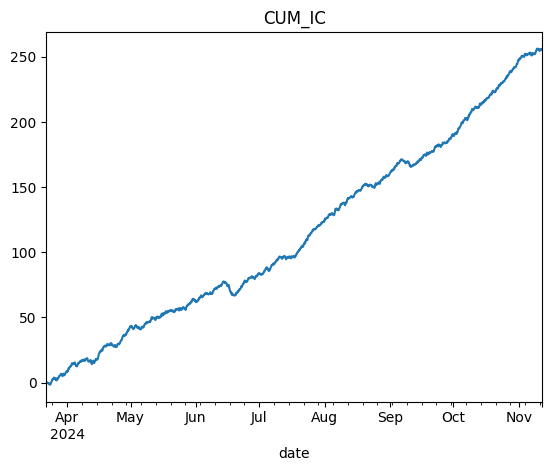

In [163]:
ic_result.cumsum().plot(title = 'CUM_IC')

<Axes: title={'center': 'IC_WEEKLY'}, xlabel='date'>

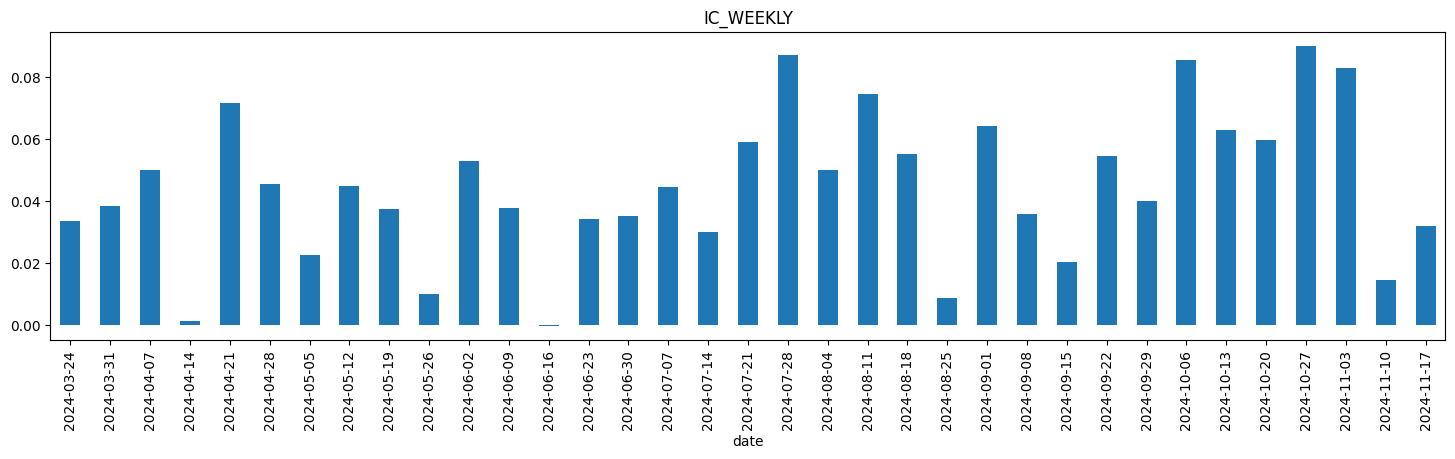

In [165]:
ic_day = ic_result.resample('W').mean()
ic_day.index = ic_day.index.strftime("%F")
ic_day.plot(kind = 'bar',figsize=(18,4),title = 'IC_WEEKLY')

In [161]:
Factor_Group_Analysis(combine_factor_df, open_df, 10, 4, '')

/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:36: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_df = open_df.pct_change().shift(-2).dropna(how='all', axis=0).stack()


 当前：5644 / 总量：5647

(     weekly_ret  group
 G1    -0.004064      1
 G2    -0.003424      2
 G3     0.004174      3
 G4    -0.008025      4
 G5    -0.004568      5
 G6    -0.003455      6
 G7     0.000109      7
 G8     0.007985      8
 G9     0.003901      9
 G10    0.004430     10,
 0.5758)

In [166]:
# Latest week combine factors check
combine_factor_latest_week_df = combine_factor_df.iloc[-168:]

In [167]:
Quick_Factor_Return_N_IC(combine_factor_latest_week_df, open_df, 4, 'combo', '1h')

/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_n = open_df.pct_change(n).shift(-n - 1)


(date
 2024-11-05 07:00:00+00:00   -0.033185
 2024-11-05 08:00:00+00:00    0.028827
 2024-11-05 09:00:00+00:00    0.019274
 2024-11-05 10:00:00+00:00    0.087285
 2024-11-05 11:00:00+00:00   -0.042844
                                ...   
 2024-11-11 21:00:00+00:00   -0.084932
 2024-11-11 22:00:00+00:00   -0.004440
 2024-11-11 23:00:00+00:00   -0.056874
 2024-11-12 00:00:00+00:00   -0.088281
 2024-11-12 01:00:00+00:00   -0.082040
 Length: 163, dtype: float64,
 {'name': 'combo',
  'time frame': '1h',
  'IC mean': 0.0218,
  'IC std': 0.1628,
  'IR': 0.1339,
  'IC>0': 0.5276,
  'ABS_IC>2%': 0.9202})

In [169]:
Factor_Group_Analysis(combine_factor_latest_week_df, open_df, 10, 4, '')

/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks/factor_analysis_helper.py:36: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_df = open_df.pct_change().shift(-2).dropna(how='all', axis=0).stack()


 当前：164 / 总量：168

(     weekly_ret  group
 G1    -0.028748      1
 G2     0.018223      2
 G3     0.111576      3
 G4     0.006810      4
 G5     0.020495      5
 G6     0.034446      6
 G7    -0.023823      7
 G8    -0.055122      8
 G9    -0.014879      9
 G10   -0.069054     10,
 -0.4667)